In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [9]:
# Network Parameters
n_input = 2
n_classes = 2

In [10]:
X, y = datasets.make_circles(n_samples=800, noise=0.2, factor=.3, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 0.949928209
Epoch: 0011 cost= 0.681767046
Epoch: 0021 cost= 0.600678936
Epoch: 0031 cost= 0.494663760
Epoch: 0041 cost= 0.464782104
Epoch: 0051 cost= 0.460725278
Epoch: 0061 cost= 0.455360539
Epoch: 0071 cost= 0.452259302
Epoch: 0081 cost= 0.453167759
Epoch: 0091 cost= 0.448314846
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

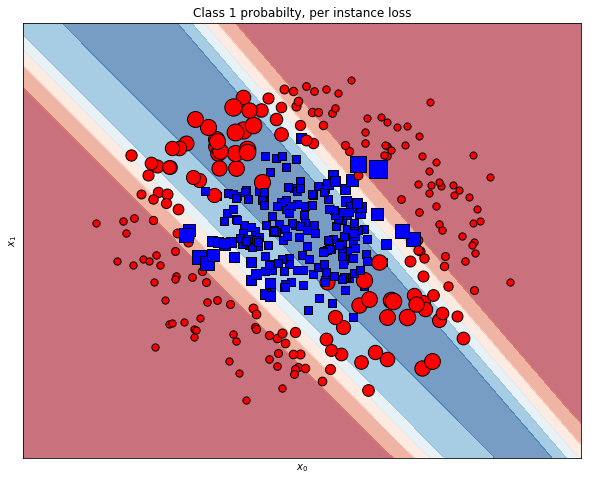

In [11]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=100,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, marker_size="loss")

# PU setup

In [12]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

Using [ 1.  1.]
Epoch: 0001 cost= 0.724690124
Epoch: 0011 cost= 0.499818064
Epoch: 0021 cost= 0.456964843
Epoch: 0031 cost= 0.434682332
Epoch: 0041 cost= 0.416811317
Epoch: 0051 cost= 0.396379635
Epoch: 0061 cost= 0.389434487
Epoch: 0071 cost= 0.386939973
Epoch: 0081 cost= 0.386009373
Epoch: 0091 cost= 0.385085203
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

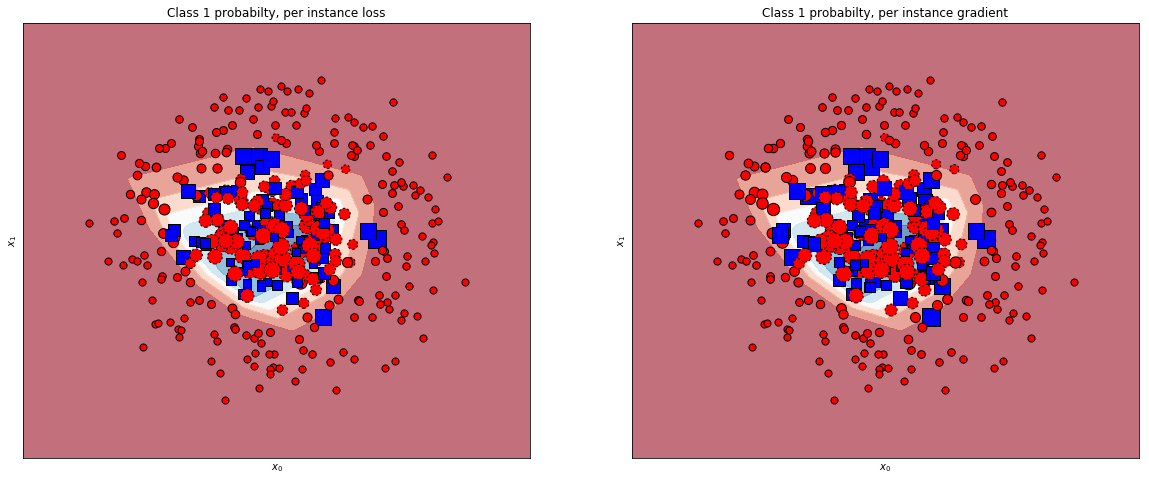

In [13]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.340307683
Epoch: 0011 cost= 0.996284559
Epoch: 0021 cost= 0.922878712
Epoch: 0031 cost= 0.851431295
Epoch: 0041 cost= 0.789745569
Epoch: 0051 cost= 0.762173355
Epoch: 0061 cost= 0.748385474
Epoch: 0071 cost= 0.737933710
Epoch: 0081 cost= 0.731080100
Epoch: 0091 cost= 0.727464646
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

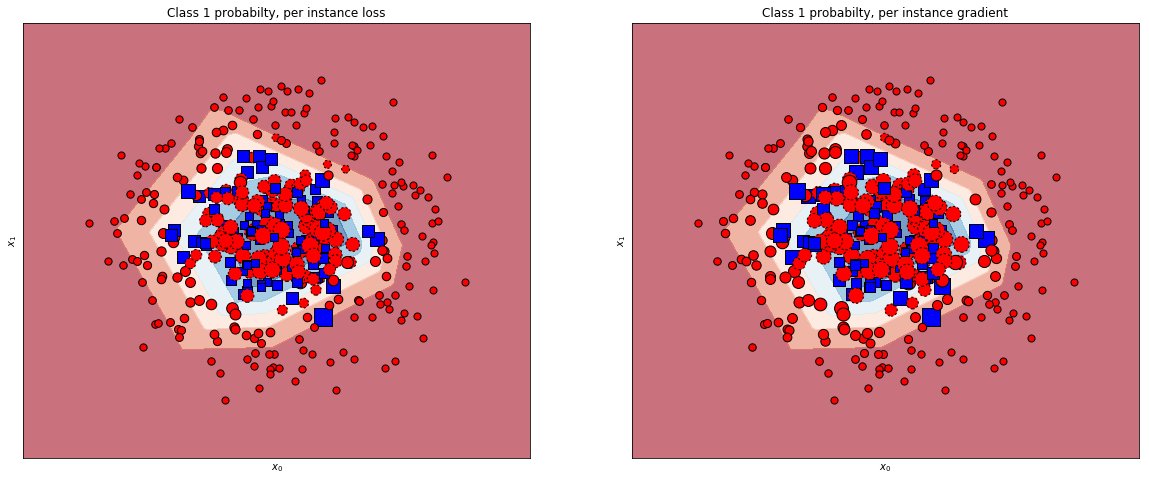

In [14]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 2.218891561
Epoch: 0011 cost= 1.420689106
Epoch: 0021 cost= 1.279203534
Epoch: 0031 cost= 1.213808745
Epoch: 0041 cost= 1.173154354
Epoch: 0051 cost= 1.092556462
Epoch: 0061 cost= 0.995471910
Epoch: 0071 cost= 0.941675693
Epoch: 0081 cost= 0.914968744
Epoch: 0091 cost= 0.898763895
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

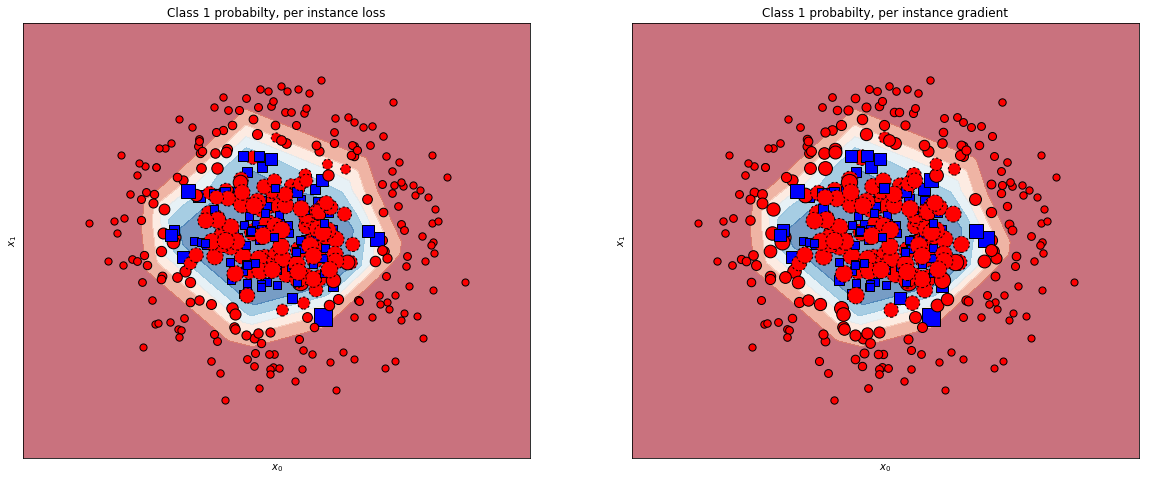

In [15]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.  1.]
Epoch: 0001 cost= 0.512828454
Epoch: 0011 cost= 0.472730555
Epoch: 0021 cost= 0.384883434
Epoch: 0031 cost= 0.326483905
Epoch: 0041 cost= 0.309384637
Epoch: 0051 cost= 0.302936330
Epoch: 0061 cost= 0.298946947
Epoch: 0071 cost= 0.294692911
Epoch: 0081 cost= 0.292593062
Epoch: 0091 cost= 0.291740656
Epoch: 0101 cost= 0.290029790
Epoch: 0111 cost= 0.289807588
Epoch: 0121 cost= 0.288784914
Epoch: 0131 cost= 0.288389668
Epoch: 0141 cost= 0.287526138
Epoch: 0151 cost= 0.287638076
Epoch: 0161 cost= 0.287025824
Epoch: 0171 cost= 0.286825202
Epoch: 0181 cost= 0.286299095
Epoch: 0191 cost= 0.286856391
Using [ 1.  1.]
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

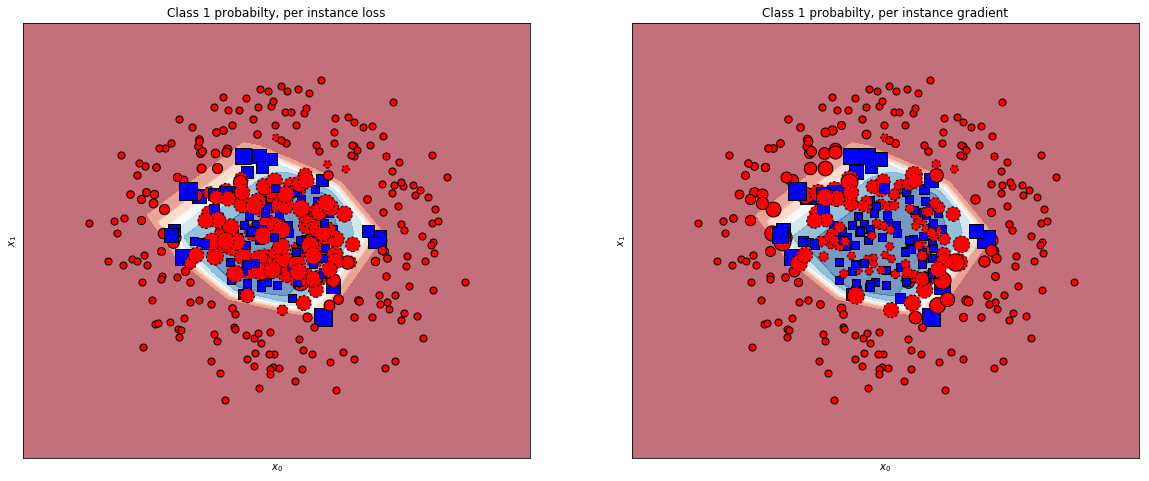

In [18]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.056876585
Epoch: 0011 cost= 0.705617562
Epoch: 0021 cost= 0.610020995
Epoch: 0031 cost= 0.494319744
Epoch: 0041 cost= 0.410170570
Epoch: 0051 cost= 0.373658955
Epoch: 0061 cost= 0.351526618
Epoch: 0071 cost= 0.339072838
Epoch: 0081 cost= 0.329607673
Epoch: 0091 cost= 0.322629541
Epoch: 0101 cost= 0.318622041
Epoch: 0111 cost= 0.314016789
Epoch: 0121 cost= 0.310750399
Epoch: 0131 cost= 0.307989828
Epoch: 0141 cost= 0.305719644
Epoch: 0151 cost= 0.304447189
Epoch: 0161 cost= 0.301749840
Epoch: 0171 cost= 0.299924277
Epoch: 0181 cost= 0.298384387
Epoch: 0191 cost= 0.297319494
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

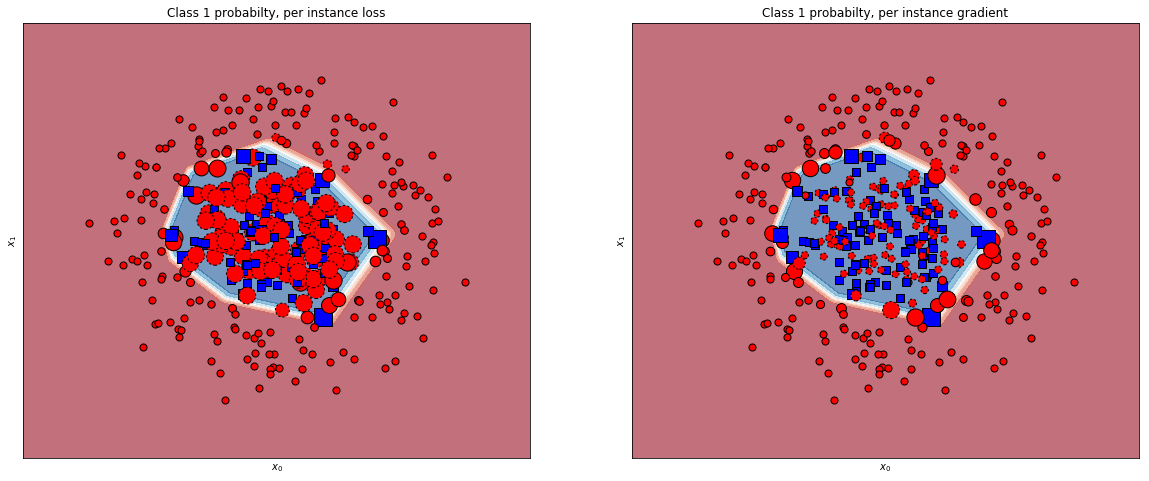

In [17]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

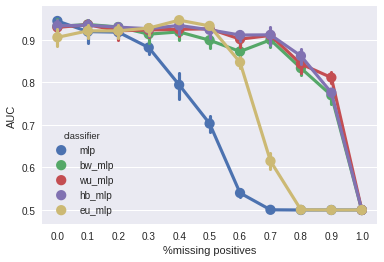

In [2]:
import seaborn as sns
import pandas as pd
%matplotlib inline

import seaborn as sns
import pandas as pd
%matplotlib inline

acc_grid = pd.read_csv('pulearn_circles.csv')

f, ax = plt.subplots(1)

data = acc_grid[acc_grid['%missing']!='%missing']

data = data.apply(pd.to_numeric, errors='ignore')

# # data = data[data['weight_u'].isin([0.3, 0.4, 0.5, 0.6])]

sns.pointplot(x='%missing', y='AUC', hue='classifier', data=data, ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')